# Descriptive Analysis

## Preparation of the Environment

### Import libraries

In [4]:
import sys
sys.path.append("..")

In [5]:
import os
import logging
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unicorn_analysis.utils.descriptive_analysis_functions as uf
import unicorn_analysis.visualization.descriptive_analysis_graphs as vg

### Define styles

In [6]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

logging.basicConfig(
    format = '%(message)s', 
    level=logging.DEBUG,  
    encoding="utf-8"
    )

### Load Data

In [7]:
df = pd.read_csv(os.path.join(os.getcwd(), os.pardir, 'data', 'processed', 'unicorn_companies_prepared.csv'))
df = df.astype({'Date Joined': 'datetime64', 'Industry': 'category', 'Continent': 'category'})
df.head()

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
0,Bytedance,180,2017-04-07,Artificial intelligence,Beijing,China,Asia,2012,8.0,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100,2012-12-01,Other,Hawthorne,United States,North America,2002,7.0,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,100,2018-07-03,E-commerce & direct-to-consumer,Shenzhen,China,Asia,2008,2.0,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,95,2014-01-23,Fintech,San Francisco,United States,North America,2010,2.0,"Khosla Ventures, LowercaseCapital, capitalG"
4,Klarna,46,2011-12-12,Fintech,Stockholm,Sweden,Europe,2005,4.0,"Institutional Venture Partners, Sequoia Capita..."


## Analysis

In [8]:
df.describe(include=[object, 'category'])

,Company,Industry,City,Country,Continent,Select Investors
count,1045,1045,1045,1045,1045,1045
unique,1044,15,253,44,6,1031
top,Bolt,Fintech,San Francisco,United States,North America,"Two Sigma Ventures, Flint Capital, Commerce Ve..."
freq,2,216,152,555,580,2


In [9]:
df.describe(datetime_is_numeric=True)

,Valuation,Date Joined,Year Founded,Funding
count,1045.000000,1045,1045.000000,1045.000000
mean,3.478469,2020-05-20 16:23:53.110047744,2012.885167,0.557741
min,1.000000,2011-04-02 00:00:00,1919.000000,0.000000
25%,1.000000,2019-05-16 00:00:00,2011.000000,0.223000
50%,2.000000,2021-03-26 00:00:00,2014.000000,0.370000
75%,3.000000,2021-09-21 00:00:00,2016.000000,0.610000
max,180.000000,2022-04-05 00:00:00,2021.000000,14.000000
std,8.612828,NaN,5.698879,0.814560


We begin our analysis using the function .describe() which allows us to see broadly how our data is. Something notable that we can observe is that in the variable "Company" we have two companies with the same name, these two companies may be repeated data so we must take it into account later in the analysis. Also when observing how the data of our numerical variables behave, we see that our variables "Valuation" and "Funding" present a large range and that the data have a bias to the left with a large dispersion.

**Company**

In [10]:
df[df['Company'] == 'Bolt']

,Company,Valuation,Date Joined,Industry,City,Country,Continent,Year Founded,Funding,Select Investors
39,Bolt,11,2018-05-29,Auto & transportation,Tallinn,Estonia,Europe,2013,1.0,"Didi Chuxing, Diamler, TMT Investments"
43,Bolt,11,2021-10-08,Fintech,San Francisco,United States,North America,2014,1.0,"Activant Capital, Tribe Capital, General Atlantic"


First we analyze our variable "Company" to find out why we have two companies with the same name. We see that it is not repeated data, rather it is a great coincidence that we have two companies with the same name; one European and one American. Something that is also very curious is that both companies are valued at 11 billion and were founded with 1 billion.

**Valuation**

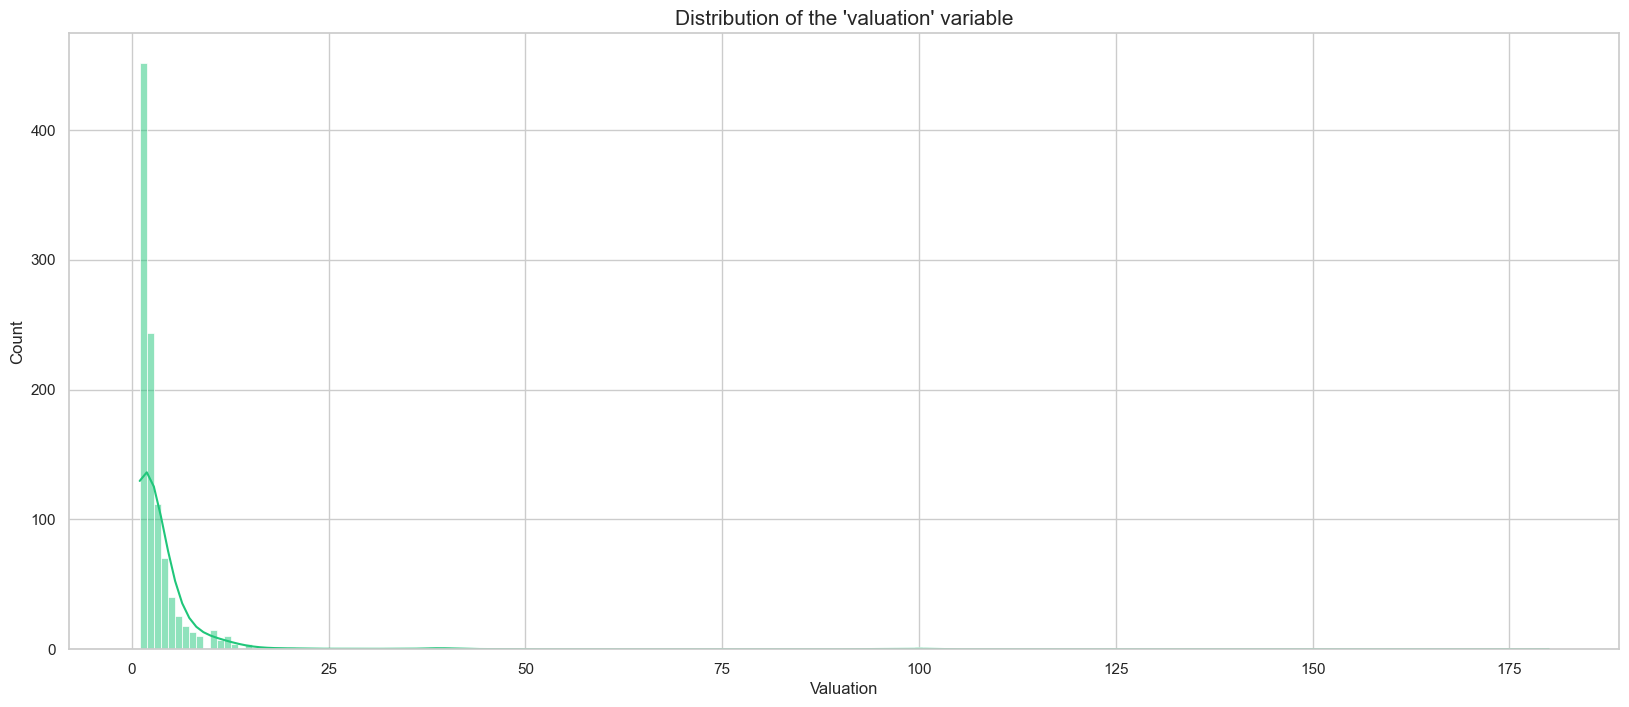

In [12]:
vg.histplot_variable_variation(df, 'Valuation', [20,8], "Distribution of the 'valuation' variable")

In [13]:
uf.numerical_variable_variation(df['Valuation'])

Valor Minimo: 1.0
Valor Maximo: 180.0
Rango: 179.0
Media: 3.48
Desviacion Estandar: 8.61


As initially inferred, our variable "Valuation" presents a very large range with a large bias to the left. We can attribute this behavior to the nature of the variable because as we know, the valuation of a company is the result of many factors and that is why there are companies with a high value and others with a low value (remember that the valuation is defined in billions so we can not underestimate the company with the lowest value).

**Industry**

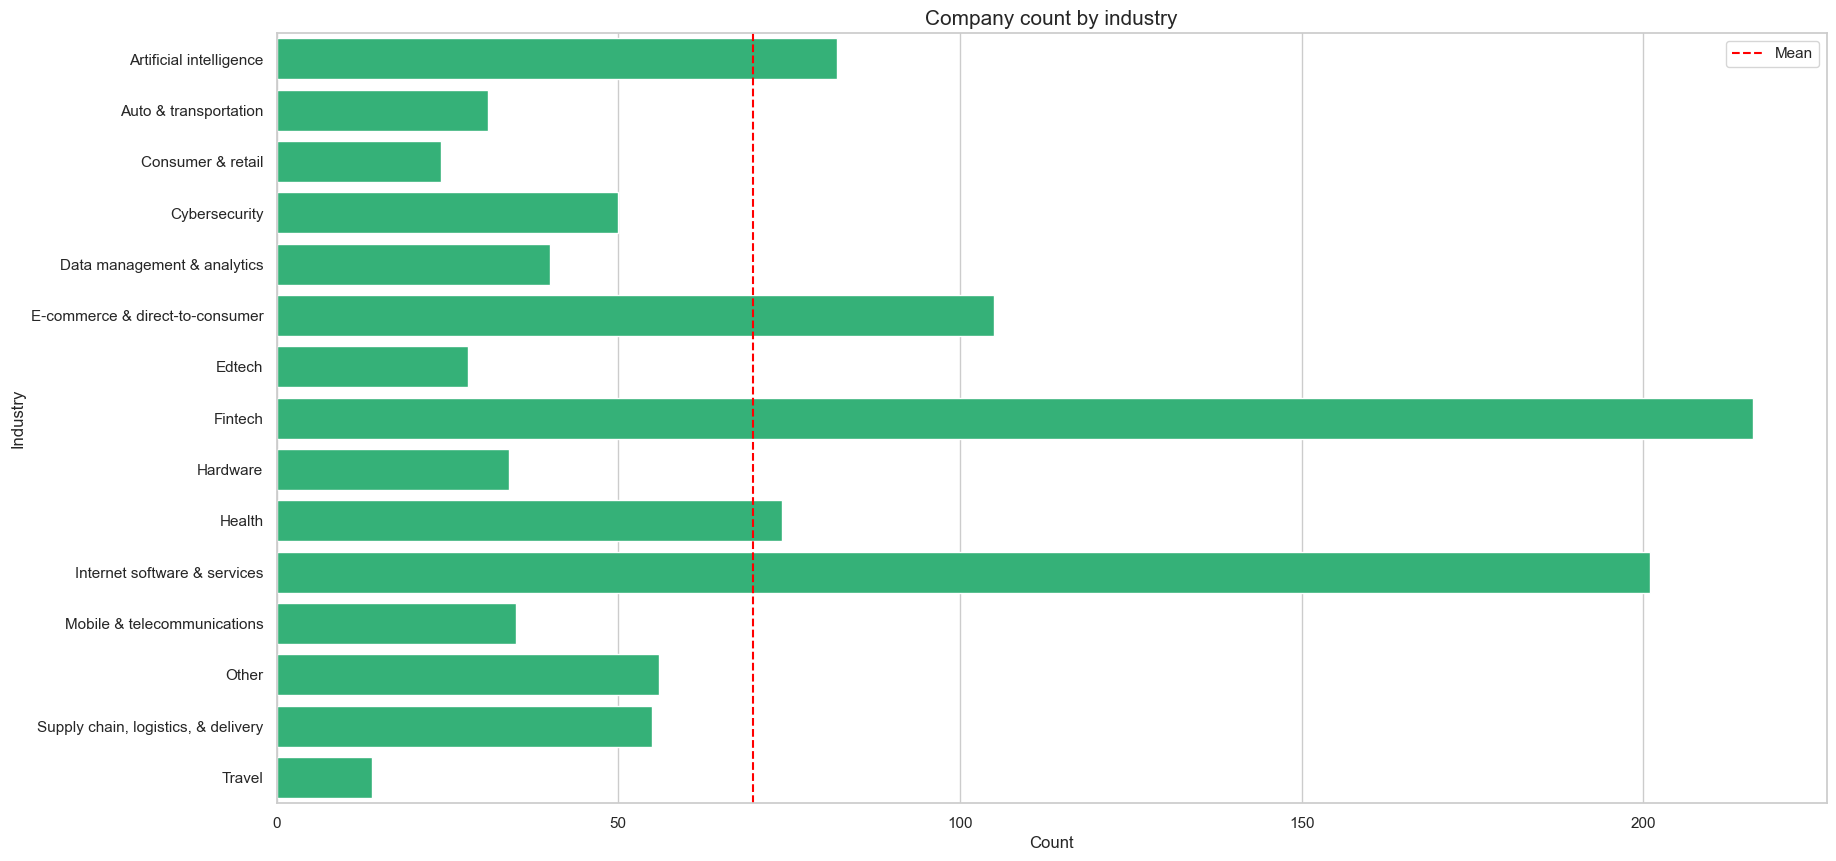

33.33% above average


In [14]:
vg.bargraph_without_delimitation(df, 'Industry', [20, 10], "Company count by industry", uf.average(df, 'Industry'))

In this graph we can easily observe the number of existing companies by industry. The industries that have the most companies and that we could also consider the most "popular" are:
- Fintech
- Internet software & services 
- E-commerce & direct-to-consumer
- Artificial intelligence

With a total of 5 industries that pass the average number of companies and that represent 33% of the data. If you want to start a business with a scalable vision in any of these industries, you should keep in mind that competition can be very high and even more so after the pandemic which allowed to see the potential of these industries. In addition to these industries that are trending, we can see how the "Travel" industry is at the bottom and it is understandable because it was one of the most affected by the pandemic.

**City**

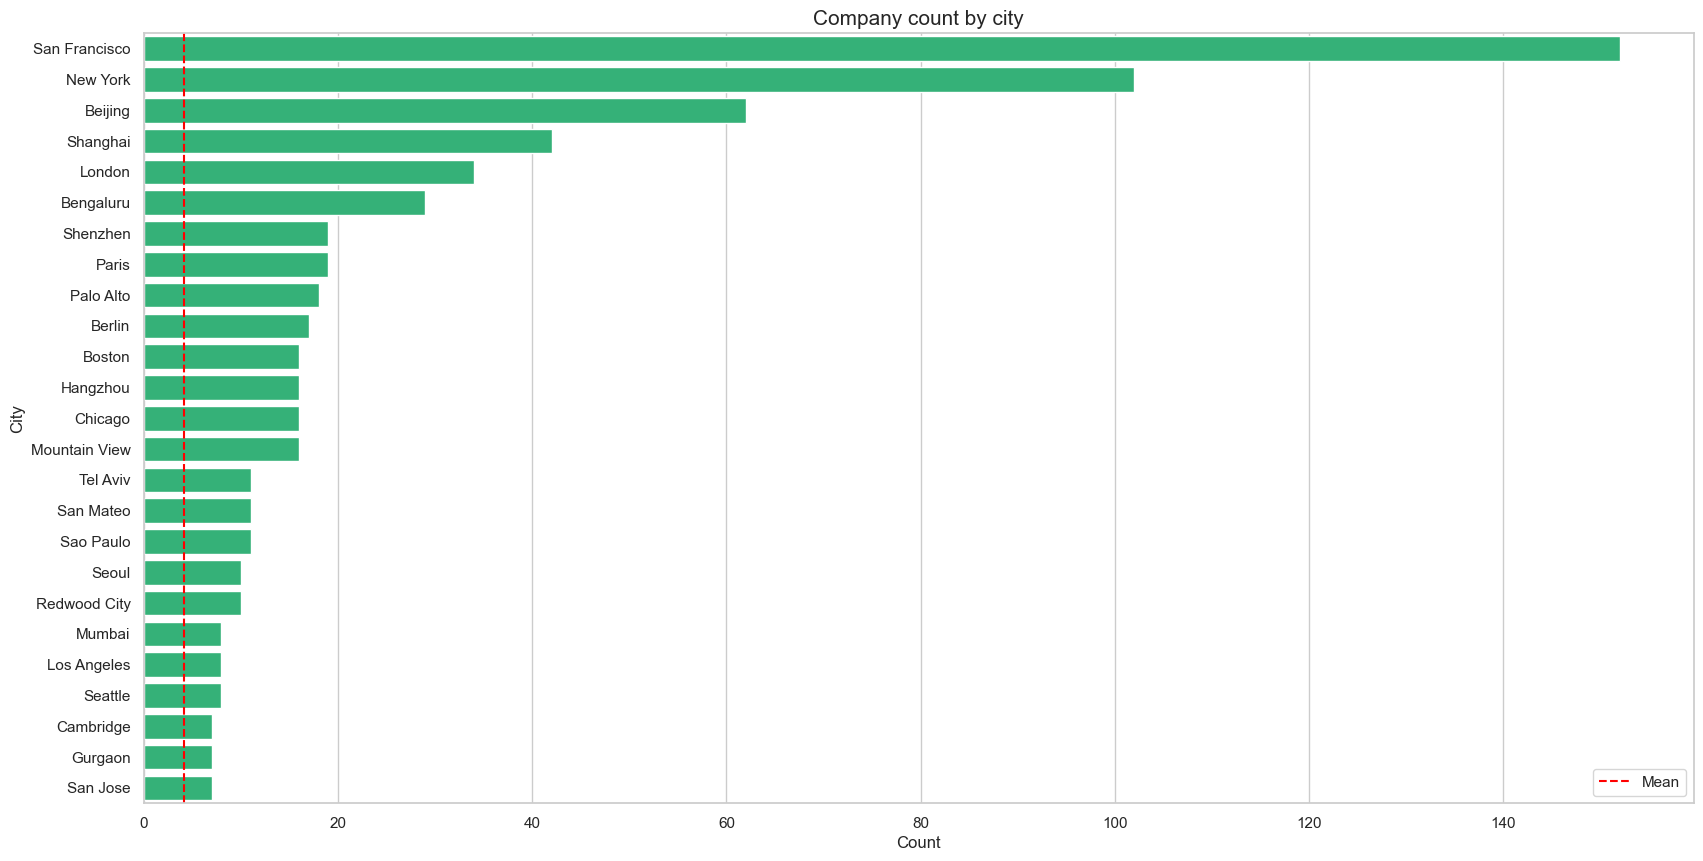

17.0% above average


In [15]:
vg.bargraph_with_delimitation(df, 'City', 25, [20, 10], "Company count by city", uf.average(df, 'City'))

**Country**

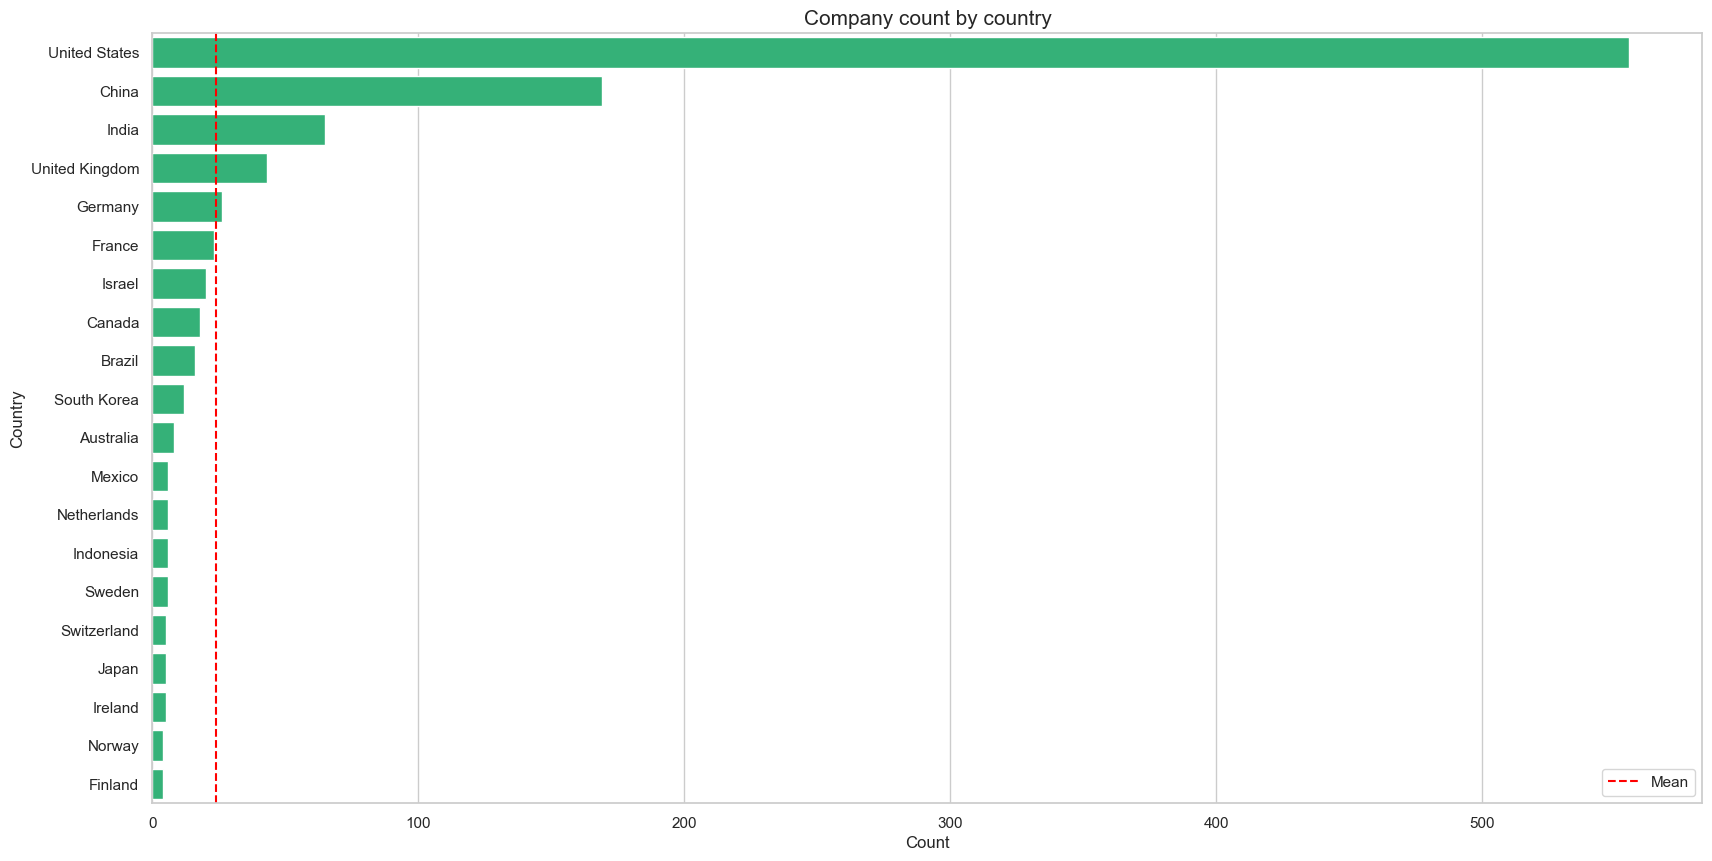

11.36% above average


In [16]:
vg.bargraph_with_delimitation(df, 'Country', 20, [20, 10], "Company count by country", uf.average(df, 'Country'))

**Continent**

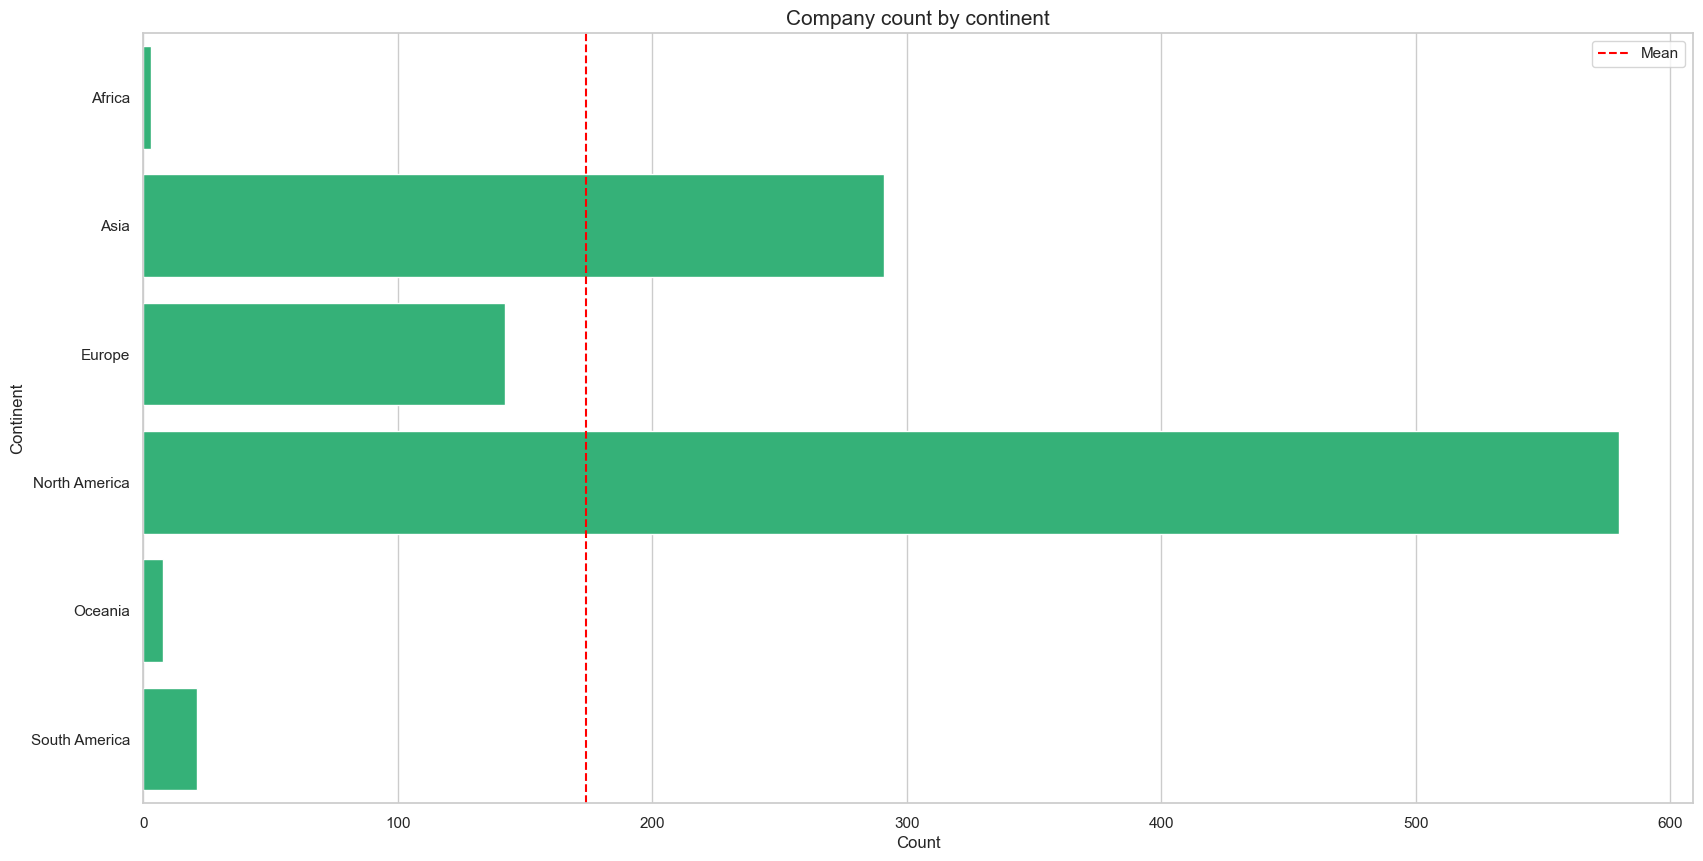

33.33% above average


In [17]:
vg.bargraph_without_delimitation(df, 'Continent', [20, 10], "Company count by continent", uf.average(df, 'Continent'))

**Year Founded**

In [18]:
(
    df['Year Founded']
    .astype('category')
    .value_counts()
    .reset_index()
    .rename({'index': 'Year Founded', 'Year Founded': 'Count'},  axis=1)
    .head()
)

,Year Founded,Count
0,2015,150
1,2016,109
2,2014,107
3,2012,93
4,2013,85


**Funding**

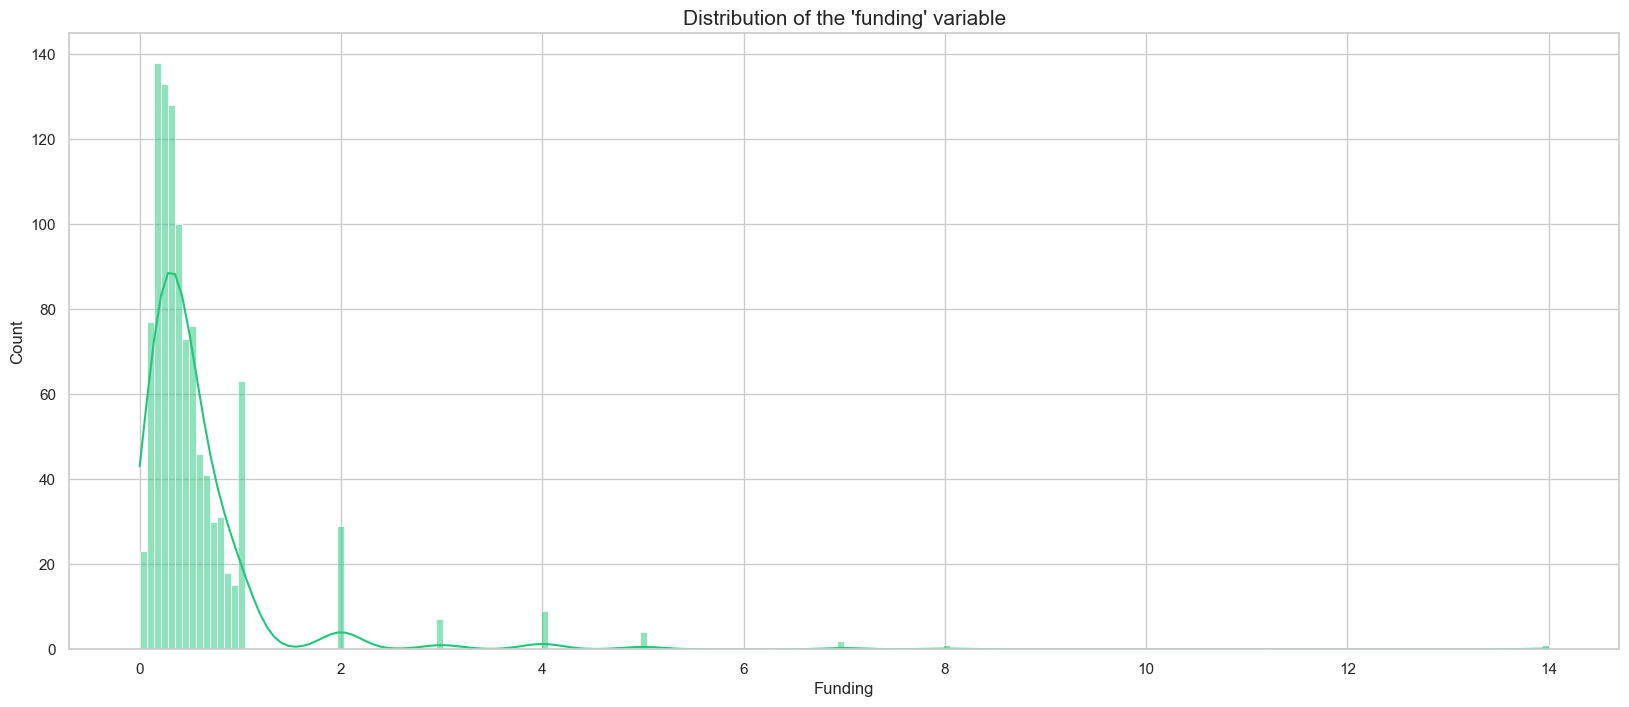

In [19]:
vg.histplot_variable_variation(df, 'Funding', [20,8], "Distribution of the 'funding' variable")

In [20]:
uf.numerical_variable_variation(df['Funding'])

Valor Minimo: 0.0
Valor Maximo: 14.0
Rango: 14.0
Media: 0.56
Desviacion Estandar: 0.81


Like the "Valuation" variable, this variable also presents a bias to the left and in this one it is very clear that it is due to the nature of the variable because if we remember, several data of this variable were modified because they were in different scales and it is for this reason that also the range has become even larger. Another curiosity is that there is a company founded with 0 amount of investment, we should take this company into account in future analysis.

### Correlation

locator: <matplotlib.ticker.AutoLocator object at 0x7f8eeadbad30>
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved
top of Axes not in the figure, so title not moved


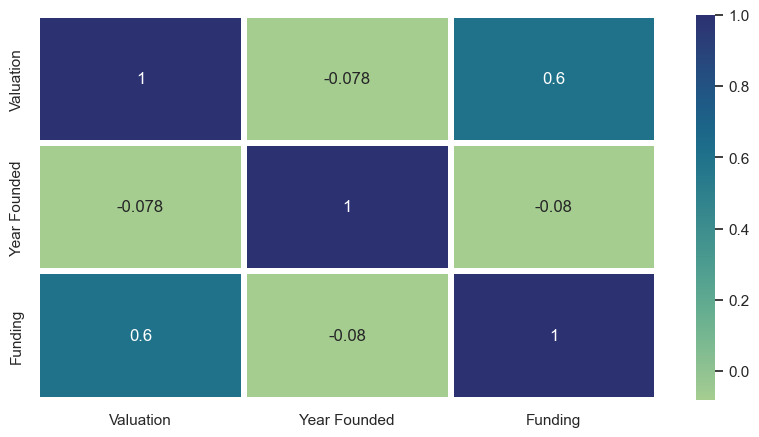

In [21]:
plt.figure(figsize=[10,5])
sns.heatmap(df.corr(), annot=True, linewidths=3, cmap="crest")
plt.show()

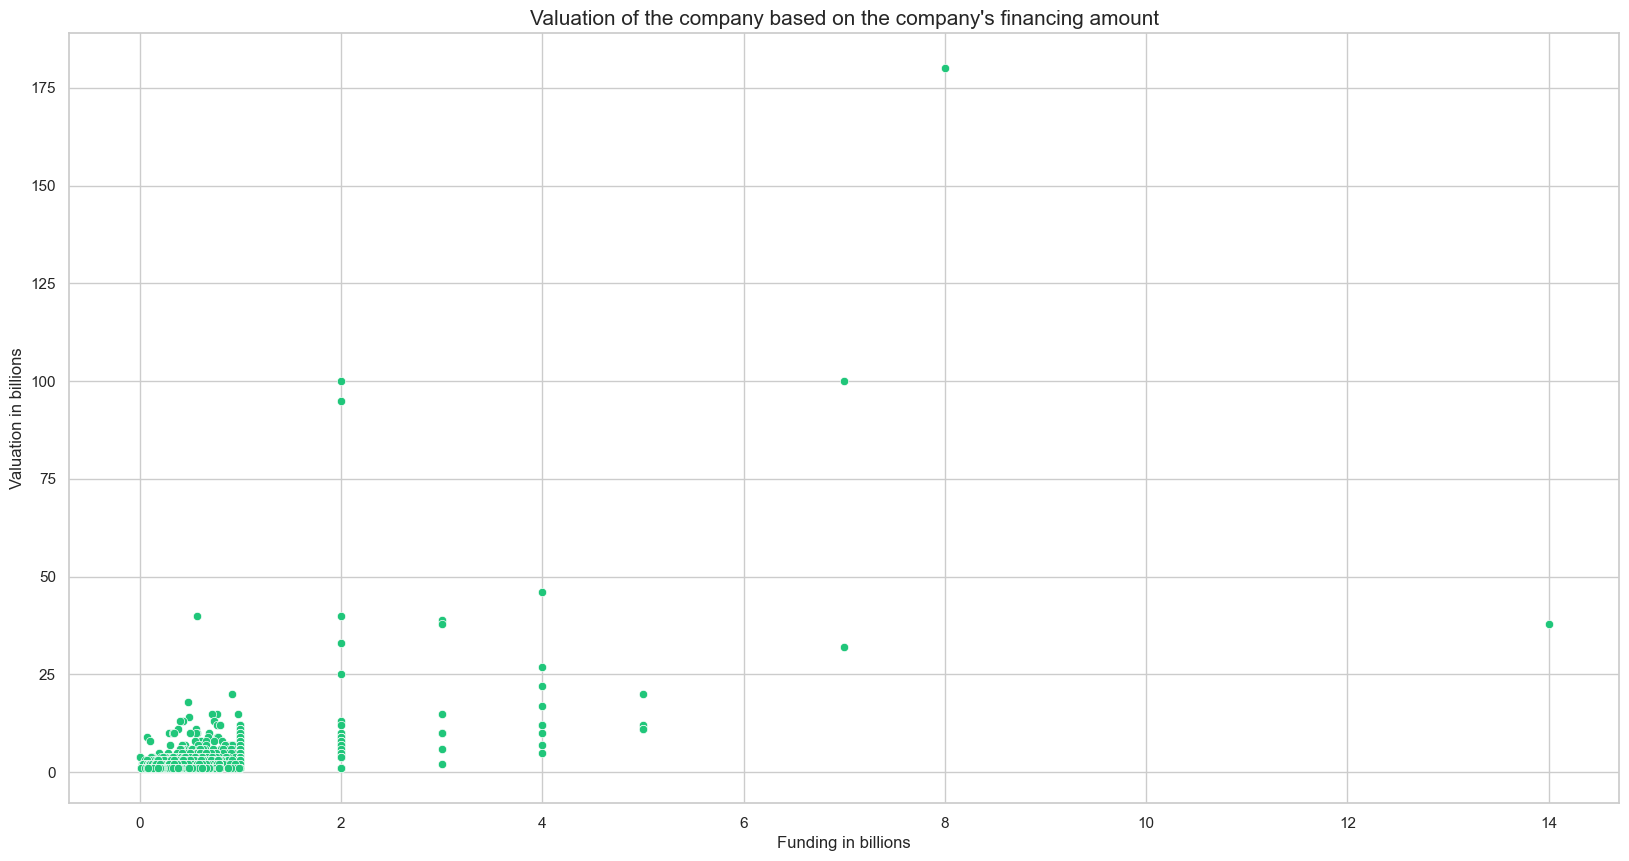

In [22]:
plt.figure(figsize=[20,10])

sns.scatterplot(x=df.Funding, y=df.Valuation, color='#20c67a')

plt.title("Valuation of the company based on the company's financing amount", fontsize=15)
plt.ylabel("Valuation in billions")
plt.xlabel("Funding in billions")

plt.show()